In [56]:
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


# 1. Créez la matrice augmentée X, comme vu en cours

In [73]:
# data generation -------------------
X=np.random.uniform(0,10,(100,1))
X=np.concatenate((X, np.ones((100,1))),axis=1)

# 2. Calculez le vecteur y à partir de X et de u

In [74]:
# noise generation -------------------
true_param=np.array([[4],[2]])
N = np.random.normal (0,5,(100,1))
y=X@true_param+N

# 3. Affichez le nuage de points résultant sur un graphique

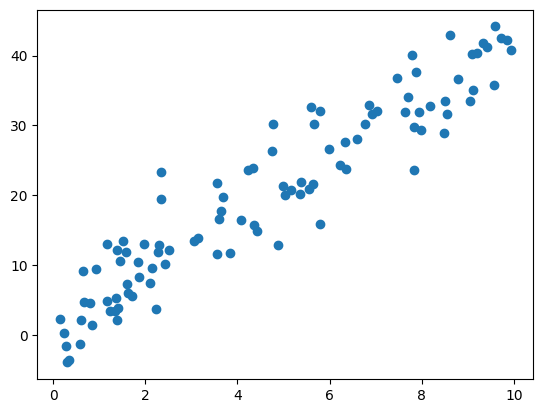

In [75]:
plt.scatter(X[:,0],y)

# 4. Calculez les paramètres de régression linéaire sur ces données en utilisant la méthode des moindres carrés ordinaires

In [76]:
w = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))
w

array([[4.06637106],
       [1.38481907]])

In [78]:
y_predi=X@w

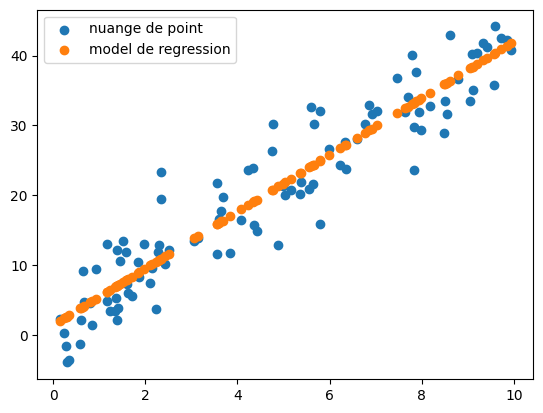

In [81]:
plt.scatter(X[:,0],y,label='nuange de point')
plt.scatter(X[:,0],y_predi,label='model de regression')
plt.legend()

In [84]:
errer=0.5*np.linalg.norm(y-y_predi)**2
errer

np.float64(906.2522156146515)

## On voit que la droite de regression passe par le milieu des points c'est à dire elle minimise sa distance avec l'ensemble des points 

# 2 Régression linéaire multiple

In [89]:
filename = "./prostate.csv"
df = pd.read_csv(filename , delimiter=";")
df

,idx,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,1,-1.637356,-2.006212,-1.862426,-1.024706,-0.522941,-0.863171,-1.042157,-0.864467,-0.430783,T
1,2,-1.988980,-0.722009,-0.787896,-1.024706,-0.522941,-0.863171,-1.042157,-0.864467,-0.162519,T
2,3,-1.578819,-2.188784,1.361163,-1.024706,-0.522941,-0.863171,0.342627,-0.155348,-0.162519,T
3,4,-2.166917,-0.807994,-0.787896,-1.024706,-0.522941,-0.863171,-1.042157,-0.864467,-0.162519,T
4,5,-0.507874,-0.458834,-0.250631,-1.024706,-0.522941,-0.863171,-1.042157,-0.864467,0.371564,T
...,...,...,...,...,...,...,...,...,...,...,...
92,93,1.255920,0.577607,0.555266,-1.024706,1.892548,1.073572,0.342627,1.262889,4.385147,T
93,94,2.096506,0.625489,-2.668323,-1.024706,1.892548,1.679542,0.342627,0.553770,4.684443,T
94,95,1.321402,-0.543304,-1.593794,-1.024706,1.892548,1.890377,0.342627,-0.509907,5.143124,F
95,96,1.300290,0.338384,0.555266,1.004813,1.892548,1.242632,0.342627,1.972007,5.477509,T


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   idx      97 non-null     int64  
 1   lcavol   97 non-null     float64
 2   lweight  97 non-null     float64
 3   age      97 non-null     float64
 4   lbph     97 non-null     float64
 5   svi      97 non-null     float64
 6   lcp      97 non-null     float64
 7   gleason  97 non-null     float64
 8   pgg45    97 non-null     float64
 9   lpsa     97 non-null     float64
 10  train    97 non-null     object 
dtypes: float64(9), int64(1), object(1)
memory usage: 8.5+ KB


In [93]:
df['train'].unique()

array(['T', 'F'], dtype=object)

In [115]:
df.columns

Index(['idx', 'lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason',
       'pgg45', 'lpsa', 'train'],
      dtype='object')

# 2. Créez deux sous-ensembles de données, pour l’apprentissage et pour le test :

In [134]:
X_train=df[df['train']=='T']
Y_train=df[df['train']=='T']['lpsa']
X_test=df[df['train']=='F']
Y_test=df[df['train']=='F']['lpsa']
X_train=X_train[['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason',
       'pgg45']]
X_test=X_test[['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason',
       'pgg45']]
print(f"Trainset: n = {X_train.shape [0]} inst., d = {X_train.shape [1]} feat.")
...
print(f"Testset: m = {X_test.shape [0]} inst., d = {X_test.shape [1]} feat.")

Trainset: n = 67 inst., d = 8 feat.
Testset: m = 30 inst., d = 8 feat.


# 3. Calculez les paramètres du modèle de régression linéaire sur les données d’apprentissage

In [135]:
X_train=np.concatenate((X_train, np.ones((X_train.shape[0], 1))), axis=1)
X_test=np.concatenate((X_test, np.ones((X_test.shape[0], 1))), axis=1)

In [136]:
w = np.dot(np.linalg.inv(np.dot(X_train.T, X_train)),np.dot(X_train.T, Y_train))
w

array([ 0.67952814,  0.26305307, -0.14146483,  0.21014656,  0.3052006 ,
       -0.28849277, -0.02130504,  0.26695576,  2.46493292])

In [137]:
print(f'w = {w[:-1]} et b={w[-1]}')

w = [ 0.67952814  0.26305307 -0.14146483  0.21014656  0.3052006  -0.28849277
 -0.02130504  0.26695576] et b=2.4649329221237446


## On a les meme valeurs que le tableau

# 5. Utilisez le modèle résultant pour prédire les valeurs de y pour les données de test

In [149]:
y_predi_test=X_test@w

# 6. Calculez l’erreur quadratique moyenne (MSE) sur les données de test, ainsi que l’écart-type correspondant

In [150]:
erreu_quadratiq=(Y_test-y_predi_test)**2
MSE=np.mean(erreu_quadratiq)
print(f'MSE = {MSE}')

MSE = 0.5212740055076


In [158]:
ecart_type=np.std(erreu_quadratiq)
print(f'Ecart-Type = {ecart_type}')

Ecart-Type = 0.962457936337452
